## Sentiment Analysis

In [1]:
import train_SA

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wangyangyi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangyangyi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/wangyangyi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/wangyangyi/nltk_data...
[nltk_data]   Package words is already up-to-date!


ModuleNotFoundError: No module named 'src'

In [2]:
train_SA.run_sa_pipeline()

=========================CLEANING DATA=========================
========================READ RAW DATA=======================
=======================LOWERCASE TEXT=======================
========================TOKENIZE TEXT=======================
=====================REMOVE PUNCTUATION=====================
======================REMOVE STOPWORDS======================
=====================REMOVE SHORT WORDS=====================
==================CONVERT AMAZON.COM TOKENS=================
=====================REMOVE CONTRACTIONS====================
=====================REMOVE PUNCTUATION=====================
========================REMOVE DIGITS=======================
======================LEMMATIZE TOKENS======================
======================REMOVE DUPLICATES=====================
======================APPEND LABELS=========================
==================DATA PREPROCESSING DONE===================
=======================ORIGINAL TEXT========================
0    this is a very h

/Users/wangyangyi/Documents/GitHub/DSA4263_T00/src/sentiment_analysis/prep/preprocess.py:346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[:,'cleaned2'] = final_df.loc[:,'cleaned'].apply(lambda x: ' '.join(x))
2023-04-13 23:03:47.713329: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
35/35 [==============================] - 3s 48ms/step - loss: 0.6112 - accuracy: 0.7316 - val_loss: 0.5296 - val_accuracy: 0.7401
Epoch 2/10
35/35 [==============================] - 1s 38ms/step - loss: 0.4472 - accuracy: 0.7497 - val_loss: 0.3847 - val_accuracy: 0.7879
Epoch 3/10
35/35 [==============================] - 1s 37ms/step - loss: 0.2532 - accuracy: 0.9098 - val_loss: 0.3102 - val_accuracy: 0.8650
Epoch 4/10
35/35 [==============================] - 1s 37ms/step - loss: 0.1467 - accuracy: 0.9607 - val_loss: 0.3184 - val_accuracy: 0.8567
Epoch 5/10
35/35 [==============================] - 1s 37ms/step - loss: 0.0845 - accuracy: 0.9791 - val_loss: 0.3311 - val_accuracy: 0.8669
Epoch 6/10
35/35 [==============================] - 1s 37ms/step - loss: 0.0444 - accuracy: 0.9927 - val_loss: 0.3799 - val_accuracy: 0.8641
Epoch 7/10
35/35 [==============================] - 1s 37ms/step - loss: 0.0294 - accuracy: 0.9943 - val_loss: 0.4280 - val_accuracy: 0.8604
Epoch 8/10
35

INFO:tensorflow:Assets written to: ram://f59806a4-0f2f-4878-945a-22d4aaa3b407/assets


INFO:tensorflow:Assets written to: ram://f59806a4-0f2f-4878-945a-22d4aaa3b407/assets


You can find trained model in trained_models
============================DONE============================
=========================GETTING PREDICTIONS=========================
35/35 [==============================] - 0s 6ms/step
=======================LSTM PREDICTIONS========================
                                                   Text  predicted
1186  i came home from a hot morning in the arizona ...        1.0
4765  overall, this mix is okay, but, the sugar cont...        0.0
410   these really are good i gave some to other peo...        1.0
1945  this is a poor excuse for coffee - even for in...        0.0
3848  we sent this basket to my mother in law for mo...        1.0
=======================VADER PREDICTIONS========================
                                                   Text  predicted
1186  i came home from a hot morning in the arizona ...          1
4765  overall, this mix is okay, but, the sugar cont...          1
410   these really are good i gave some

INFO:tensorflow:Assets written to: ram://4e424aa1-1f0b-49ab-8808-e3647bbb6500/assets


INFO:tensorflow:Assets written to: ram://4e424aa1-1f0b-49ab-8808-e3647bbb6500/assets


You can find trained model in trained_models
============================END OF PIPELINE============================


After evaluating the performance of the different models, our selection compared the scores across the 2 models. From the output we can see that LSTM performed better in all aspects - Accuracy, precision, ROC AUC, Recall and F1 score. Therefore, LSTM is deemed as the best model for sentiment analysis.

## New Data Predictions

In [3]:
from sentiment_analysis.train import evaluate

In [4]:
evaluate.get_score("../datasets/reviews_test.csv")

========================READ RAW DATA=======================
=======================LOWERCASE TEXT=======================
========================TOKENIZE TEXT=======================
=====================REMOVE PUNCTUATION=====================
======================REMOVE STOPWORDS======================
=====================REMOVE SHORT WORDS=====================
==================CONVERT AMAZON.COM TOKENS=================
=====================REMOVE CONTRACTIONS====================
=====================REMOVE PUNCTUATION=====================
========================REMOVE DIGITS=======================
======================LEMMATIZE TOKENS======================
======================REMOVE DUPLICATES=====================
==================DATA PREPROCESSING DONE===================
=======================ORIGINAL TEXT========================
0    this is a very healthy dog food. good for thei...
1    i've been very pleased with the natural balanc...
2    before i was educated about fel

/Users/wangyangyi/Documents/GitHub/DSA4263_T00/src/sentiment_analysis/prep/preprocess.py:349: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[:,'cleaned2'] = final_df.loc[:,'cleaned'].apply(lambda x: ' '.join(x))


171/171 [==============================] - 1s 5ms/step
Predicted csv has been generated


## Topic Modeling

In [1]:
import train_TM

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wangyangyi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangyangyi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/wangyangyi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/wangyangyi/nltk_data...
[nltk_data]   Package words is already up-to-date!
/Users/wangyangyi/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-13 23:19:40.595962: I tensorflow/core/platform/cpu_feature_guard.cc:193] This Tens

=========================CLEANING DATA=========================
========================READ RAW DATA=======================
=======================LOWERCASE TEXT=======================
========================TOKENIZE TEXT=======================
=====================REMOVE PUNCTUATION=====================
======================REMOVE STOPWORDS======================
=====================REMOVE SHORT WORDS=====================
==================CONVERT AMAZON.COM TOKENS=================
=====================REMOVE CONTRACTIONS====================
=====================REMOVE PUNCTUATION=====================
========================REMOVE DIGITS=======================
======================LEMMATIZE TOKENS======================
======================REMOVE DUPLICATES=====================
======================APPEND LABELS=========================
==================DATA PREPROCESSING DONE===================
=======================ORIGINAL TEXT========================
0    this is a very h

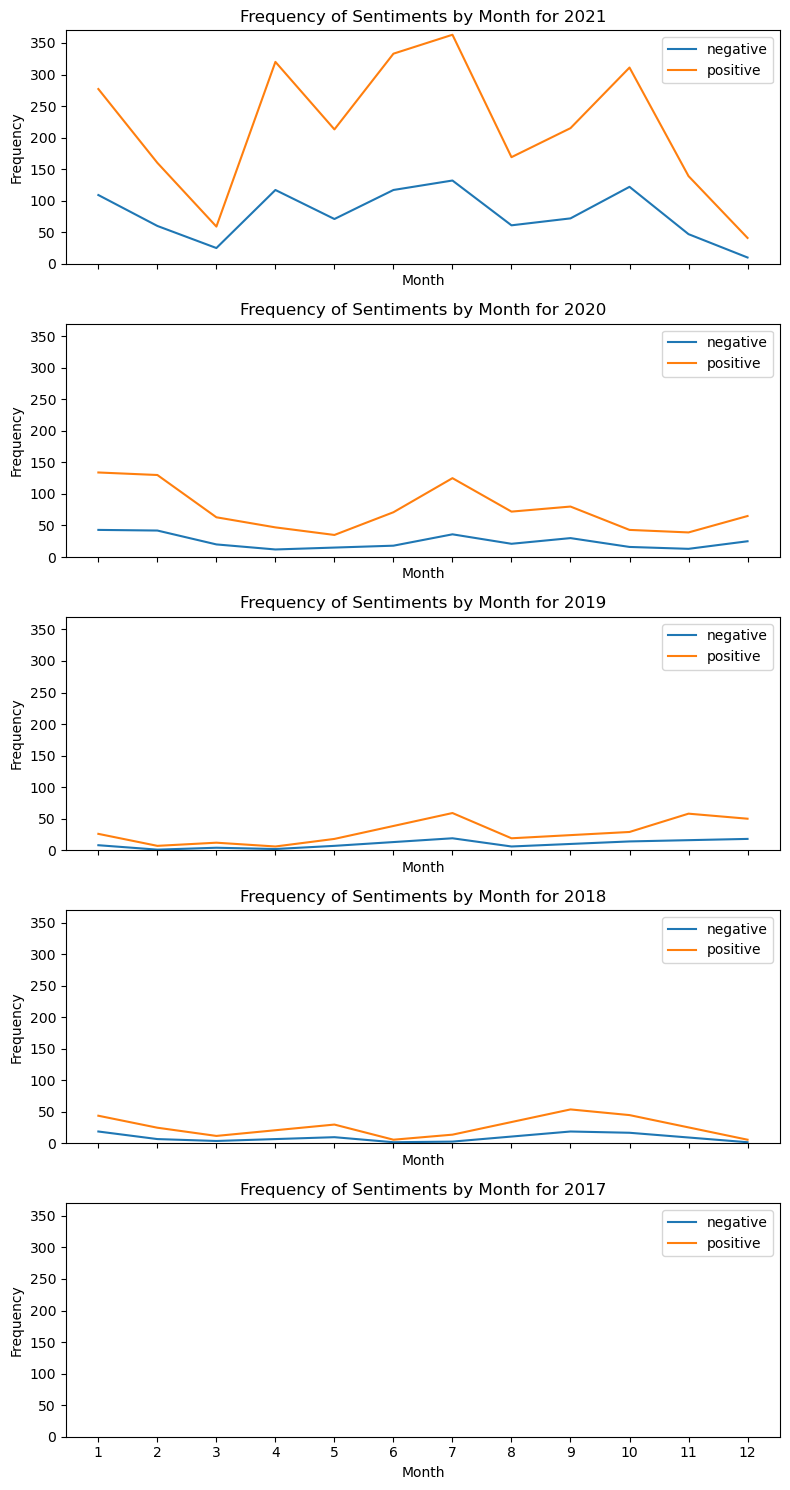

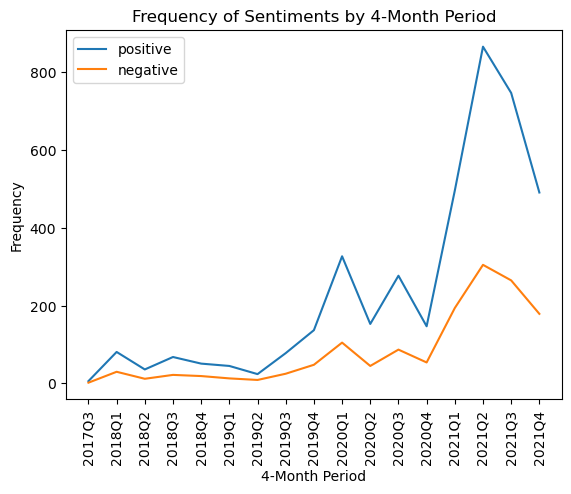

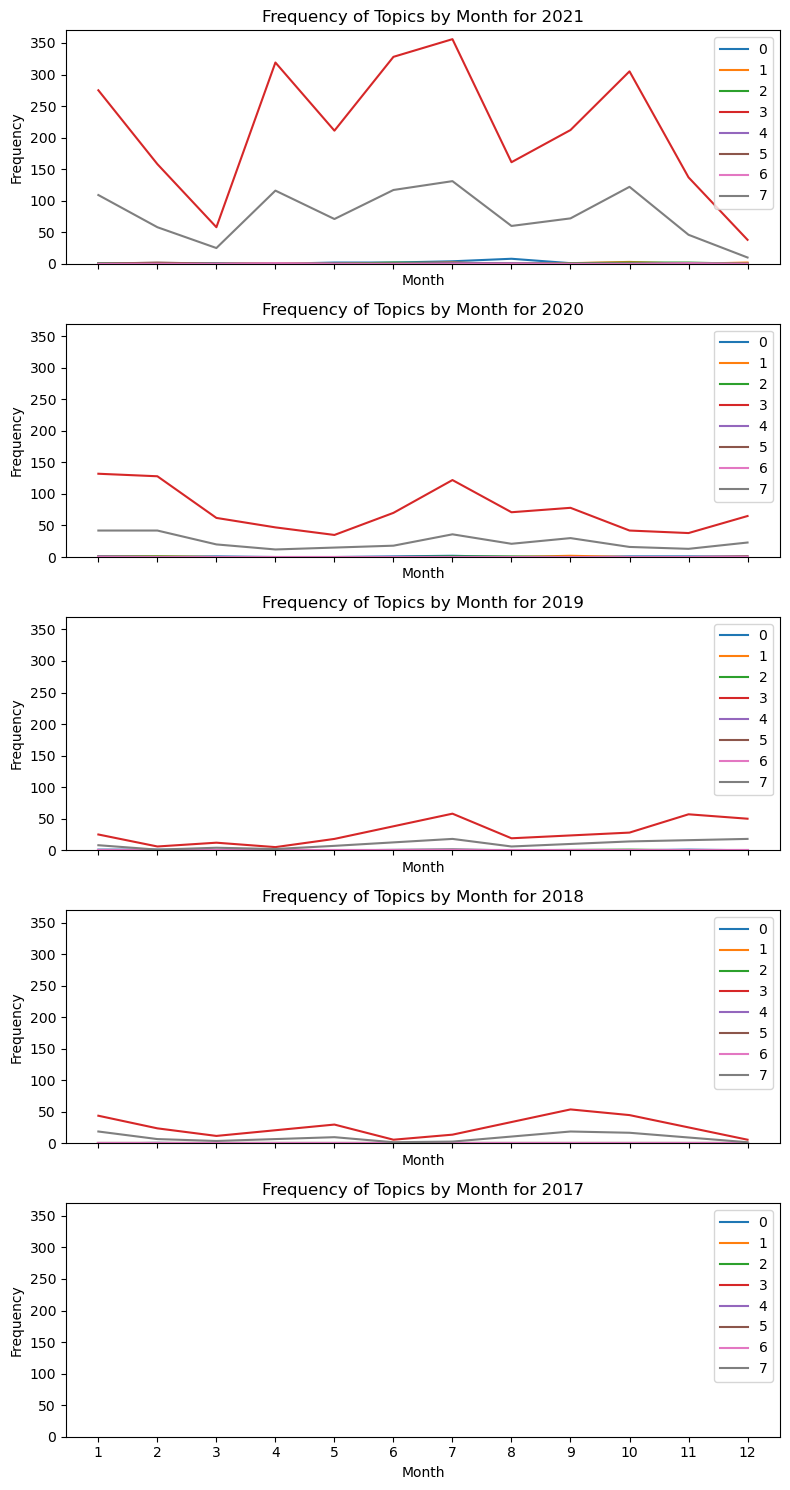

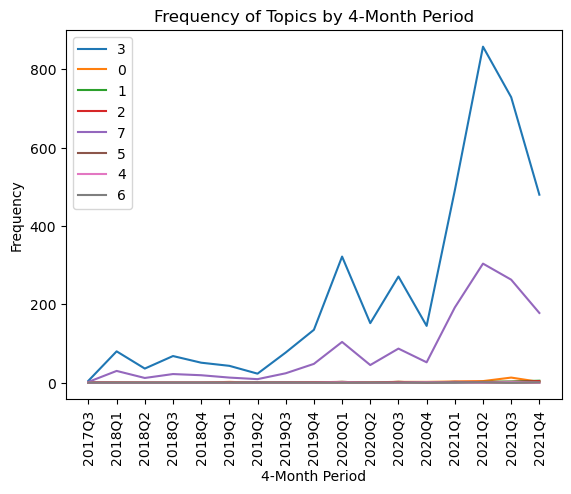

============================DONE============================
=========================BERT MODEL=========================
=========================BERT MODEL FAILED DUE TO IMPORTS=========================
============================END OF PIPELINE============================


In [2]:
train_TM.run_tm_pipeline()